In [1]:
import os

import re
import nltk
import numpy as np
import pandas as pd
import pickle as pkl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from nltk.stem.wordnet import WordNetLemmatizer

import math
import chardet


In [2]:
path ="C:/Users/hp/social/noisolation"
 
files = os.listdir(path)
files

note =[]

for i in files[:]:
    if ".txt" in i:
        with open(os.path.join(path,i), 'rb') as f:
            result = chardet.detect(f.read()) 
        #print(i)
        #print(result["encoding"])        
        
        with open(os.path.join(path,i),encoding=result["encoding"]) as f:
            result = f.read()  # or readline if the file is large

        note.append(result)
#print(note)
print(len(note))



439


In [3]:
social_no = pd.DataFrame({"document":note,"label":np.repeat(0,len(note))})

In [4]:
import os
path = "C:/Users/hp/social/isolation"
 
files = os.listdir(path)
files

note1=[]

for i in files[:]:
    if ".txt" in i:
        with open(os.path.join(path,i) ,'rb') as f:
            result = chardet.detect(f.read()) 
        #print(i)
        #print(result["encoding"])

        with open(os.path.join(path,i),encoding=result["encoding"]) as f:
            result = f.read()  # or readline if the file is large

        note1.append(result)
        
print(len(note1))

96


In [5]:
social_yes = pd.DataFrame({"document":note1,"label":np.repeat(1,len(note1))})

In [6]:
# select all 439 nosocial notes and add to all_list
"""
all_data = social_no.append(social_yes)
print(len(all_data))
print(all_data[:3])
print(all_data[-3:-1])
"""

'\nall_data = social_no.append(social_yes)\nprint(len(all_data))\nprint(all_data[:3])\nprint(all_data[-3:-1])\n'

In [7]:
# random select 100 nosocial notes and add to all_list

#all_data = social_no.append(social_yes)

# random choice social_no notes with the same number of social notes (96)

import random

s_no_select = social_no.iloc[np.random.choice(len(social_yes)+4, replace=False, size=(len(social_yes))+4)]

all_data = s_no_select.append(social_yes)

print(len(all_data))
print(all_data[:3])
print(all_data[-3:-1])


196
                                             document  label
6   Psychiatric Attending Daily Progress Note     ...      0
59  Behavior Health Clinical Intake Transfer Note ...      0
84  Psychology Progress Note     Admission Date: 9...      0
                                             document  label
93  Psychiatric Attending Daily Progress Note     ...      1
94  TRANSFER OF CARE NOTE    Admission:   Please s...      1


In [8]:
corpusList=all_data[all_data.columns[0]].tolist()
labels=all_data[all_data.columns[1]].tolist()


In [9]:
def tokenize(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [ token for token in tokens if re.search('(^[a-zA-Z]+$)', token) ]
    a=[]
    for i in filtered_tokens:
        a.append(WordNetLemmatizer().lemmatize(i,'v'))
    return a
    #return filtered_tokens


cachedStopWords = stopwords.words("english")

In [10]:
cv = TfidfVectorizer(lowercase=True,
                     ngram_range=(1, 3), preprocessor=None, stop_words='english',
                     strip_accents=None, tokenizer=tokenize, vocabulary=None)
X1 = cv.fit_transform(corpusList)
print(X1.shape)
print()
lexicon = cv.get_feature_names()
#print (lexicon)
print()

(196, 77689)




In [11]:
x=X1  ## for select fetures 
print(x.shape)

Y = np.array(labels)
Y  ## class level 


(196, 77689)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(x.shape)

X_new = SelectKBest(chi2, k=600).fit_transform(x, Y)   # select 400 features
X_new.shape


(196, 77689)


(196, 600)

In [13]:
X=X_new        # make unque name for next cell 
X_new.shape

(196, 600)

In [14]:
"ExtraTreesClassifier"

'ExtraTreesClassifier'

In [15]:
model=0
results = []
cont = []
kf = KFold(n_splits=10, shuffle=True)
trees = [10, 30, 60, 100, 300, 500]
for t in range(len(trees)):
    fold = 1
    truth = []
    rf_prediction = []
    print("model ", t, ": ExtraTreesClassifier = " + str(trees[t]))
    test_count = 0
    rf = ExtraTreesClassifier(bootstrap=False,
           criterion='entropy', max_depth=15, max_features=0.9,
           max_leaf_nodes=None, min_impurity_decrease=1e-045,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=trees[t], n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
    for train_idx, test_idx in kf.split(X):
        trainX = X[train_idx]
        trainY = Y[train_idx]
        testX = X[test_idx]
        testY = Y[test_idx]
        truth.append(testY)
        rf.fit(trainX, trainY)
        Y_hat = rf.predict(testX)
        rf_prediction.append(Y_hat)
        print("   Fold %d accuracy: %.2f %%" % (fold, ((np.sum(Y_hat == testY)/len(testY)) * 100.0)))                        
        fold += 1
    truth = np.concatenate(truth, axis=0)    
    rf_prediction = np.concatenate(rf_prediction, axis=0)
    test_results = np.sum(rf_prediction == truth)/len(truth)
    print("     Overall test accuracy: %.2f %%" % (test_results * 100))  
    rf = rf.fit(X, Y)
    Y_hat = rf.predict(X)
    train_results = np.sum(Y_hat == Y)/len(Y)
    print("     Overall training accuracy: %.2f %%" % (train_results * 100.0))  
    results.append([train_results, test_results])   
    cont.append([truth, rf_prediction])
    
    
    
### this case is not 88%, it will be a liitle bit diffenet. but not too much 

model  0 : ExtraTreesClassifier = 10
   Fold 1 accuracy: 60.00 %
   Fold 2 accuracy: 65.00 %
   Fold 3 accuracy: 75.00 %
   Fold 4 accuracy: 75.00 %
   Fold 5 accuracy: 70.00 %
   Fold 6 accuracy: 75.00 %
   Fold 7 accuracy: 68.42 %
   Fold 8 accuracy: 84.21 %
   Fold 9 accuracy: 52.63 %
   Fold 10 accuracy: 84.21 %
     Overall test accuracy: 70.92 %
     Overall training accuracy: 100.00 %
model  1 : ExtraTreesClassifier = 30
   Fold 1 accuracy: 70.00 %
   Fold 2 accuracy: 65.00 %
   Fold 3 accuracy: 80.00 %
   Fold 4 accuracy: 70.00 %
   Fold 5 accuracy: 80.00 %
   Fold 6 accuracy: 90.00 %
   Fold 7 accuracy: 78.95 %
   Fold 8 accuracy: 84.21 %
   Fold 9 accuracy: 68.42 %
   Fold 10 accuracy: 68.42 %
     Overall test accuracy: 75.51 %
     Overall training accuracy: 100.00 %
model  2 : ExtraTreesClassifier = 60
   Fold 1 accuracy: 70.00 %
   Fold 2 accuracy: 80.00 %
   Fold 3 accuracy: 80.00 %
   Fold 4 accuracy: 70.00 %
   Fold 5 accuracy: 75.00 %
   Fold 6 accuracy: 80.00 %
   Fo

In [16]:
model = input("Enter Best Model: ")
best = cont[int(model)]
rf_ct = pd.crosstab(best[1], best[0], margins=True)
rf_ct.columns = ["no", "social", "Total"]
rf_ct.index = ["no", "social", "Total"]
print()
print("ExtraTrees")
print(rf_ct)
print()

Enter Best Model: 3

ExtraTrees
         no  social  Total
no       83      27    110
social   17      69     86
Total   100      96    196



In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,classification_report
y_true =cont[int(model)][0]
y_pred = cont[int(model)][1]
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred) )



print(recall_score(y_true, y_pred),   )
print(precision_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))


[[83 17]
 [27 69]]
0.758241758242
0.71875
0.802325581395
0.775510204082
             precision    recall  f1-score   support

          0       0.75      0.83      0.79       100
          1       0.80      0.72      0.76        96

avg / total       0.78      0.78      0.77       196



In [18]:
Sens = rf_ct.iloc[1][1]/rf_ct.iloc[2][1]
Spec = rf_ct.iloc[0][0]/rf_ct.iloc[2][0]
PPV = rf_ct.iloc[1][1]/rf_ct.iloc[1][2]
NPV = rf_ct.iloc[0][0]/rf_ct.iloc[0][2]
ACC = (rf_ct.iloc[0][0] + rf_ct.iloc[1][1]) / rf_ct.iloc[2][2]
print("ExtraTrees: Sensitivity: %.5f Specificity: %.5f PPV: %.5f NPV: %.5f Accuracy: %.5f" % (Sens, Spec, PPV, NPV, ACC))

ExtraTrees: Sensitivity: 0.71875 Specificity: 0.83000 PPV: 0.80233 NPV: 0.75455 Accuracy: 0.77551


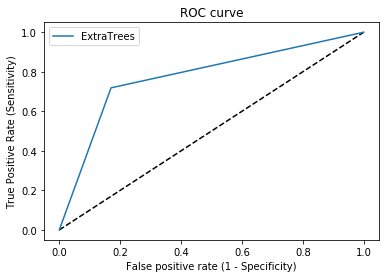

AUC =  0.774375


In [19]:

rf_fpr, rf_tpr, rf_thresholds = roc_curve(best[0], best[1], pos_label=1)
roc_auc = auc(rf_fpr, rf_tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_fpr, rf_tpr, label='ExtraTrees')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print("AUC = ", roc_auc)

In [20]:
"SVM"

'SVM'

In [21]:
model = 0
cont = []
results = pd.DataFrame(columns=('name', 'accuracy'))
kf = KFold(n_splits=10, shuffle=True)
C = [1,2,4,6,8,10]
gamma = [1,2]  
for g in range(len(gamma)):
    acc = []
    name = "SVM RBF Gamma=%.3f" % (gamma[g])     
    for c in range(len(C)):
        fold = 1
        truth = []
        svm_prediction = []
        print("model %d: SVM RBF Gamma=%.3f C=%.2f" % (model, gamma[g], C[c]))        
        test_count = 0
        svm = SVC(C=C[c], kernel='rbf', gamma=gamma[g])
        for train_idx, test_idx in kf.split(X):
            trainX = X[train_idx]
            trainY = Y[train_idx]
            testX = X[test_idx]
            testY = Y[test_idx]
            truth.append(testY)
            svm.fit(trainX, trainY)
            Y_hat = svm.predict(testX)
            svm_prediction.append(Y_hat)
            print("   Fold %d accuracy: %.2f %%" % (fold, ((np.sum(Y_hat == testY)/len(testY)) * 100.0)))                        
            fold += 1
        truth = np.concatenate(truth, axis=0)    
        svm_prediction = np.concatenate(svm_prediction, axis=0)
        test_results = np.sum(svm_prediction == truth)/len(truth)
        print("     Overall test accuracy: %.2f %%" % (test_results * 100))  
        svm = svm.fit(X, Y)
        Y_hat = svm.predict(X)
        train_results = np.sum(Y_hat == Y)/len(Y)
        print("     Overall training accuracy: %.2f %%" % (train_results * 100.0))  
        acc.append([train_results, test_results])   
        cont.append([truth, svm_prediction])
        model += 1
    results = results.append({'name': name, 'accuracy' : acc}, ignore_index=True)


model 0: SVM RBF Gamma=1.000 C=1.00
   Fold 1 accuracy: 85.00 %
   Fold 2 accuracy: 80.00 %
   Fold 3 accuracy: 65.00 %
   Fold 4 accuracy: 75.00 %
   Fold 5 accuracy: 55.00 %
   Fold 6 accuracy: 60.00 %
   Fold 7 accuracy: 73.68 %
   Fold 8 accuracy: 73.68 %
   Fold 9 accuracy: 52.63 %
   Fold 10 accuracy: 73.68 %
     Overall test accuracy: 69.39 %
     Overall training accuracy: 76.02 %
model 1: SVM RBF Gamma=1.000 C=2.00
   Fold 1 accuracy: 80.00 %
   Fold 2 accuracy: 55.00 %
   Fold 3 accuracy: 80.00 %
   Fold 4 accuracy: 80.00 %
   Fold 5 accuracy: 60.00 %
   Fold 6 accuracy: 55.00 %
   Fold 7 accuracy: 78.95 %
   Fold 8 accuracy: 68.42 %
   Fold 9 accuracy: 84.21 %
   Fold 10 accuracy: 63.16 %
     Overall test accuracy: 70.41 %
     Overall training accuracy: 79.08 %
model 2: SVM RBF Gamma=1.000 C=4.00
   Fold 1 accuracy: 55.00 %
   Fold 2 accuracy: 80.00 %
   Fold 3 accuracy: 70.00 %
   Fold 4 accuracy: 55.00 %
   Fold 5 accuracy: 60.00 %
   Fold 6 accuracy: 65.00 %
   Fold 7 

In [22]:
model = input("Enter Best Model: ")
best = cont[int(model)]
rf_ct = pd.crosstab(best[1], best[0], margins=True)
rf_ct.columns = ["no", "social", "Total"]
rf_ct.index = ["no", "social", "Total"]
print()
print("SVM")
print(rf_ct)
print()

Enter Best Model: 11

SVM
         no  social  Total
no       83      28    111
social   17      68     85
Total   100      96    196



In [23]:
Sens = rf_ct.iloc[1][1]/rf_ct.iloc[2][1]
Spec = rf_ct.iloc[0][0]/rf_ct.iloc[2][0]
PPV = rf_ct.iloc[1][1]/rf_ct.iloc[1][2]
NPV = rf_ct.iloc[0][0]/rf_ct.iloc[0][2]
ACC = (rf_ct.iloc[0][0] + rf_ct.iloc[1][1]) / rf_ct.iloc[2][2]
print("Random Forest: Sensitivity: %.5f Specificity: %.5f PPV: %.5f NPV: %.5f Accuracy: %.5f" % (Sens, Spec, PPV, NPV, ACC))

Random Forest: Sensitivity: 0.70833 Specificity: 0.83000 PPV: 0.80000 NPV: 0.74775 Accuracy: 0.77041


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,classification_report
y_true =cont[int(model)][0]
y_pred = cont[int(model)][1]
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred) )



print(recall_score(y_true, y_pred),   )
print(precision_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))

[[83 17]
 [28 68]]
0.75138121547
0.708333333333
0.8
0.770408163265
             precision    recall  f1-score   support

          0       0.75      0.83      0.79       100
          1       0.80      0.71      0.75        96

avg / total       0.77      0.77      0.77       196



In [25]:
"RandomForest"

'RandomForest'

In [26]:
model=0
results = []
cont = []
kf = KFold(n_splits=10, shuffle=True)
trees = [5, 10, 50, 100, 200, 300, 400, 500]
for t in range(len(trees)):
    fold = 1
    truth = []
    rf_prediction = []
    print("model ", t, ": Random Forest trees = " + str(trees[t]))
    test_count = 0
    rf = RandomForestClassifier(n_estimators=trees[t], criterion='entropy', n_jobs=-1, )
    for train_idx, test_idx in kf.split(X):
        trainX = X[train_idx]
        trainY = Y[train_idx]
        testX = X[test_idx]
        testY = Y[test_idx]
        truth.append(testY)
        rf.fit(trainX, trainY)
        Y_hat = rf.predict(testX)
        rf_prediction.append(Y_hat)
        print("   Fold %d accuracy: %.2f %%" % (fold, ((np.sum(Y_hat == testY)/len(testY)) * 100.0)))                        
        fold += 1
    truth = np.concatenate(truth, axis=0)    
    rf_prediction = np.concatenate(rf_prediction, axis=0)
    test_results = np.sum(rf_prediction == truth)/len(truth)
    print("     Overall test accuracy: %.2f %%" % (test_results * 100))  
    rf = rf.fit(X, Y)
    Y_hat = rf.predict(X)
    train_results = np.sum(Y_hat == Y)/len(Y)
    print("     Overall training accuracy: %.2f %%" % (train_results * 100.0))  
    results.append([train_results, test_results])   
    cont.append([truth, rf_prediction])

model  0 : Random Forest trees = 5
   Fold 1 accuracy: 70.00 %
   Fold 2 accuracy: 65.00 %
   Fold 3 accuracy: 65.00 %
   Fold 4 accuracy: 75.00 %
   Fold 5 accuracy: 90.00 %
   Fold 6 accuracy: 80.00 %
   Fold 7 accuracy: 78.95 %
   Fold 8 accuracy: 57.89 %
   Fold 9 accuracy: 89.47 %
   Fold 10 accuracy: 73.68 %
     Overall test accuracy: 74.49 %
     Overall training accuracy: 97.45 %
model  1 : Random Forest trees = 10
   Fold 1 accuracy: 85.00 %
   Fold 2 accuracy: 80.00 %
   Fold 3 accuracy: 60.00 %
   Fold 4 accuracy: 65.00 %
   Fold 5 accuracy: 80.00 %
   Fold 6 accuracy: 75.00 %
   Fold 7 accuracy: 84.21 %
   Fold 8 accuracy: 68.42 %
   Fold 9 accuracy: 68.42 %
   Fold 10 accuracy: 73.68 %
     Overall test accuracy: 73.98 %
     Overall training accuracy: 97.96 %
model  2 : Random Forest trees = 50
   Fold 1 accuracy: 70.00 %
   Fold 2 accuracy: 90.00 %
   Fold 3 accuracy: 90.00 %
   Fold 4 accuracy: 75.00 %
   Fold 5 accuracy: 65.00 %
   Fold 6 accuracy: 65.00 %
   Fold 7 a

In [27]:
model = input("Enter Best Model: ")
best = cont[int(model)]
rf_ct = pd.crosstab(best[1], best[0], margins=True)
rf_ct.columns = ["no", "social", "Total"]
rf_ct.index = ["no", "social", "Total"]
print()
print("Random Forest")
print(rf_ct)
print()

Enter Best Model: 6

Random Forest
         no  social  Total
no       86      29    115
social   14      67     81
Total   100      96    196



In [28]:
Sens = rf_ct.iloc[1][1]/rf_ct.iloc[2][1]
Spec = rf_ct.iloc[0][0]/rf_ct.iloc[2][0]
PPV = rf_ct.iloc[1][1]/rf_ct.iloc[1][2]
NPV = rf_ct.iloc[0][0]/rf_ct.iloc[0][2]
ACC = (rf_ct.iloc[0][0] + rf_ct.iloc[1][1]) / rf_ct.iloc[2][2]
print("Random Forest: Sensitivity: %.5f Specificity: %.5f PPV: %.5f NPV: %.5f Accuracy: %.5f" % (Sens, Spec, PPV, NPV, ACC))

Random Forest: Sensitivity: 0.69792 Specificity: 0.86000 PPV: 0.82716 NPV: 0.74783 Accuracy: 0.78061


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,classification_report
y_true =cont[int(model)][0]
y_pred = cont[int(model)][1]
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred) )



print(recall_score(y_true, y_pred),   )
print(precision_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))

[[86 14]
 [29 67]]
0.757062146893
0.697916666667
0.827160493827
0.780612244898
             precision    recall  f1-score   support

          0       0.75      0.86      0.80       100
          1       0.83      0.70      0.76        96

avg / total       0.79      0.78      0.78       196

